In [2]:
import numpy as np
import pandas as pd
import tabula
import googletrans
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# reading data from pdf file and convert it to new csv file

tabula.convert_into(r'Data Project 2.pdf',
                    'Data Project 2.csv',
                    output_format='csv',
                    pages='all')

In [4]:
# Reading project data through pandas csv
project2_data = pd.read_csv('Data Project 2.csv',
                            encoding='ISO-8859-1')
project2_data.head()


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
# Convert csv file to pandas DataFrame
df_project2 =pd.DataFrame(project2_data)
df_project2.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [6]:
# Changing columns order
df_project2 = df_project2[['state', 'number', 'month', 'year', 'date' ]]
df_project2.head()

,state,number,month,year,date
0,Acre,0.0,Janeiro,1998,1998-01-01
1,Acre,0.0,Janeiro,1999,1999-01-01
2,Acre,0.0,Janeiro,2000,2000-01-01
3,Acre,0.0,Janeiro,2001,2001-01-01
4,Acre,0.0,Janeiro,2002,2002-01-01


In [7]:
# Rename column 'number' to 'fire_count'
df_project2.rename(columns={'number': 'fire_count'}, inplace=True)
df_project2.head()


,state,fire_count,month,year,date
0,Acre,0.0,Janeiro,1998,1998-01-01
1,Acre,0.0,Janeiro,1999,1999-01-01
2,Acre,0.0,Janeiro,2000,2000-01-01
3,Acre,0.0,Janeiro,2001,2001-01-01
4,Acre,0.0,Janeiro,2002,2002-01-01


In [8]:
# changing numbers structure
df_project2['fire_count'].replace('.', '', inplace=True)
print('Project data after changing column number from decimal to int\n\n')
df_project2.tail()

Project data after changing column number from decimal to int




,state,fire_count,month,year,date
6449,Tocantins,128.0,Dezembro,2012,2012-01-01
6450,Tocantins,85.0,Dezembro,2013,2013-01-01
6451,Tocantins,223.0,Dezembro,2014,2014-01-01
6452,Tocantins,373.0,Dezembro,2015,2015-01-01
6453,Tocantins,119.0,Dezembro,2016,2016-01-01


In [9]:
# covert all 0 values in number column to NaN, checking all NaN values
df_project2['fire_count'] = df_project2['fire_count'].replace(0, np.nan)
print(f"Count of NaN values\n{df_project2.isnull().sum()}")

Count of NaN values
state           0
fire_count    617
month           0
year            0
date            0
dtype: int64


In [10]:
# Drop all NaN values and reset index
df_project2.dropna(inplace=True)
df_project2 = df_project2.reset_index(drop=True)
df_project2.head()

,state,fire_count,month,year,date
0,Acre,10.0,Janeiro,2003,2003-01-01
1,Acre,12.0,Janeiro,2005,2005-01-01
2,Acre,4.0,Janeiro,2006,2006-01-01
3,Acre,1.0,Janeiro,2010,2010-01-01
4,Acre,1.0,Janeiro,2015,2015-01-01


In [11]:
# Checking if there is not any NaN values and printing shape of dataframe
print(f"Count of NaN values\n{df_project2.isnull().sum()}")
print(f'Shape of dataframe: {df_project2.shape}')

Count of NaN values
state         0
fire_count    0
month         0
year          0
date          0
dtype: int64
Shape of dataframe: (5837, 5)


Text(0.5, 1.0, 'Count of fire by year')

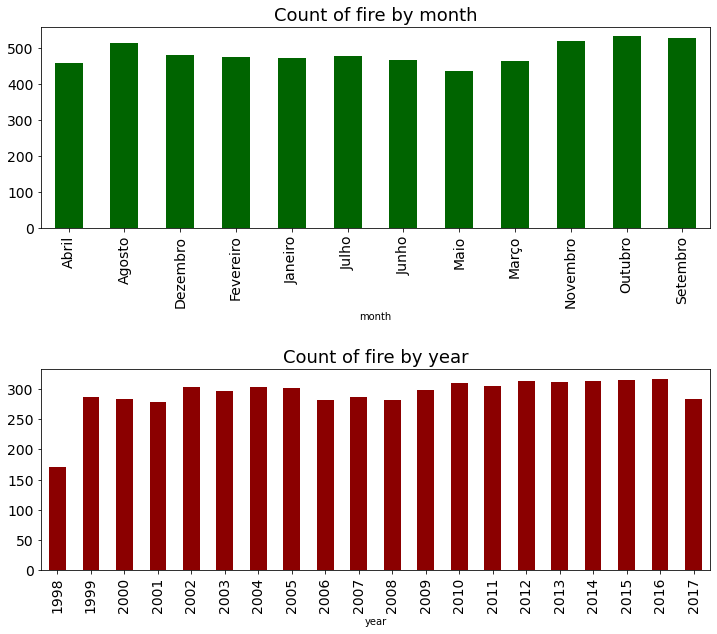

In [12]:
# Group count of fire by years and months
row_fire_by_month = df_project2['fire_count'].groupby(df_project2['month']).count()
row_fire_by_year = df_project2['fire_count'].groupby(df_project2['year']).count()


# Visualizing grouped data by month and year
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.7)

row_fire_by_month.plot.bar(ax=axs[0], fontsize=14, color='DarkGreen')
axs[0].set_title('Count of fire by month', fontsize=18)
row_fire_by_year.plot.bar(ax=axs[1], fontsize=14, color='DarkRed')
axs[1].set_title('Count of fire by year', fontsize=18)



In [13]:
# All names of all languages, for checking name of Portuguese in translator
lang_df = pd.DataFrame.from_dict(googletrans.LANGCODES,
                                 columns=['Code'],
                                 orient='index')
print(f'Names of languages in googletrans library\n{lang_df}')

# getting name of Portuguese
portuguese = lang_df.loc['portuguese', 'Code']
print(f'code of Portuguese: {portuguese}')

Names of languages in googletrans library
          Code
afrikaans   af
albanian    sq
amharic     am
arabic      ar
armenian    hy
...        ...
welsh       cy
xhosa       xh
yiddish     yi
yoruba      yo
zulu        zu

[106 rows x 1 columns]
code of Portuguese: pt


In [14]:
# Translate name of months from Portuguese to English
translator = googletrans.Translator()
df_project2['month'] = df_project2['month'].apply(lambda x:
                                                      translator.translate(
                                                          x,
                                                          src='pt',
                                                          dest='en').text)

df_project2.head()


,state,fire_count,month,year,date
0,Acre,10.0,January,2003,2003-01-01
1,Acre,12.0,January,2005,2005-01-01
2,Acre,4.0,January,2006,2006-01-01
3,Acre,1.0,January,2010,2010-01-01
4,Acre,1.0,January,2015,2015-01-01


In [15]:
# Group data by months in alphabetical order and reindex
df_sorted_months = df_project2.sort_values('month').reset_index(drop=True)
print('Grouping dataframe by sorted months in alphabetical order\n')
df_sorted_months.head()

Grouping dataframe by sorted months in alphabetical order



,state,fire_count,month,year,date
0,Espirito Santo,7.0,Abril,2017,2017-01-01
1,Pará,66.0,Abril,2016,2016-01-01
2,Rondonia,3.0,Abril,1999,1999-01-01
3,Pará,45.0,Abril,2017,2017-01-01
4,Rio,41.0,Abril,2012,2012-01-01


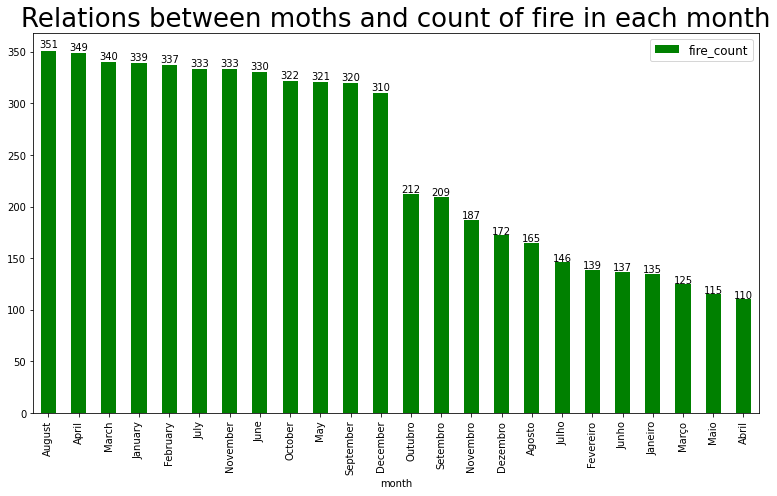

In [16]:
# Visualizing data to show relations between months and count of fire in each month

ax = df_sorted_months.groupby('month').fire_count.count()\
                .sort_values(ascending=False)\
                .plot.bar(color='Green', figsize=(13, 7))

plt.legend(fontsize= 12)
plt.title("Relations between moths and count of fire in each month",fontsize= 26)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height*1.008), ha='center')



Text(0.5, 1.0, 'Count/percentage of fire by months in Brazil')

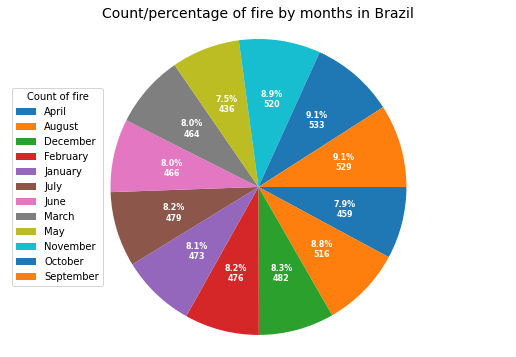

In [29]:
# Group months by fire count in separate dataframe, translate months and visualize

gpd_month = df_sorted_months.groupby('month').fire_count.count()\
                            .sort_values(ascending=False)

# covert grouped Series to DataFrame
df_gpd_month = pd.DataFrame(gpd_month).reset_index()


# Translate grouped months months
df_gpd_month['month'] = df_gpd_month['month'].apply(lambda month:
                                                    translator.translate(
                                                        month,
                                                        src='pt',
                                                         dest='en').text)


# summing repeated months' fire_count values under one unique month name
df_gpd_month = df_gpd_month.groupby('month').fire_count.sum()

# Series to DataFrame for making easy to visualize data
df_gpd_month = pd.DataFrame(df_gpd_month).reset_index()
df_gpd_month


# Visualize month by fire_count values
fig, ax = plt.subplots(figsize=(9, 6))

# count each mont's fire_count value's percentage in all values
def percent(prc, all):
    result = int(prc/100.* np.sum(all))
    return "{:.1f}%\n{:d}".format(prc, result)

wedg, text, autotext = ax.pie(df_gpd_month['fire_count'],
                                  autopct=lambda prc: percent(prc, df_gpd_month['fire_count']),
                                  textprops=dict(color="w"),
                              labels=df_gpd_month['month'],
                              counterclock=True)

ax.legend(wedg,
          df_gpd_month['month'],
          title='Count of fire',
          loc='center left')

plt.setp(autotext, size=8, weight='bold')
ax.axis('equal')
ax.set_title('Count/percentage of fire by months in Brazil', size=14)